### Simulating my first TD(n)

> Value function for TD(n) is
$$
V_t(s) = V_t(s) + \alpha(r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + \gamma^{n-1} r_{t+n-1} + \gamma^n V_{t+n}(s_{n}) - V_t(s))
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Computing the value function of TD(0) for the random walk problem from the book

In [90]:
class TDnRandomWalk(object):
    def __init__(self, nStates, n, alpha, lambda_):
        self.nStates = nStates
        self.actualV = 2*(np.arange(1, self.nStates+1))/(self.nStates+1.) -1
        self.n = n
        self.episodes = []
        self.alpha = alpha
        self.lambda_ = lambda_
        
    def generateEpisodes(self, nEpisodes):
        self.episodes = []
        for _ in xrange(nEpisodes):            
            s = self.nStates/2
            episode = [s]
            leftOrRight = np.random.choice((-1,1))
            new_s = s + leftOrRight
            while new_s >= 0 and new_s <= self.nStates-1:                
                s = new_s
                episode.append(s)
                leftOrRight = np.random.choice((-1,1))
                new_s = s + leftOrRight
            episode.append(new_s)
            self.episodes.append(episode)
  
    

    def evaluateVOnline(self, alpha, n):
        V = np.zeros(self.nStates)       
        for episode in self.episodes:
            for indState, state in enumerate(episode[:-1]):
                if indState + n < len(episode)-1:
                    #print episode[indState + n]
                    update = V[episode[indState + n]] - V[state]
                else:
                    update = 2*((episode[-1]+1.)/(self.nStates+1)) -1 - V[state]
                V[state] = V[state] + alpha*(update)
        return V
    
    def evaluateVOffline(self, alpha, n):
        V = np.zeros(self.nStates)       
        for episode in self.episodes:
            update = np.zeros(len(episode)-1)
            for indState, state in enumerate(episode[:-1]):
                if indState + n < len(episode)-1:
                    update[indState] = V[episode[indState + n]] - V[state]
                else:
                    update[indState] = 2*((episode[-1]+1.)/(self.nStates+1)) -1 - V[state]
            for ind, state in enumerate(episode[:-1]): 
                V[state] = V[state] + alpha*update[ind]
        return V
    
    
    def evaluateVTDLambda(self, lambda_, alpha):
        V = np.zeros(self.nStates)       
        for episode in self.episodes:
            update = np.zeros(len(episode)-1)
            backup = np.zeros(len(episode)-1)
            update =  np.hstack((V[episode[1:-1]], 2*((episode[-1]+1.)/(self.nStates+1)) -1 ))
#             backup = (np.cumsum(update*(np.power(lambda_, np.arange(0,len(update))))[::-1])[::-1]/
#                        np.power(lambda_, np.arange(0,len(update))))
            for ind in range(len(update)):
                backup[ind] = (1-lambda_)*np.dot(update[ind:], 
                                                 np.power(lambda_, np.arange(0,len(update)-ind)))
            for ind, state in enumerate(episode[:-1]): 
                 V[state] = V[state] + alpha*backup[ind]            
        return V
    
    def rmserror(self, array1, array2):
        return np.sqrt(((array1 - array2)**2).mean())
    
    def RMSErrorOnlineOffline(self):
        rmsEOnline = np.zeros((len(self.n), len(self.alpha)))
        rmsEOffline = np.zeros((len(self.n), len(self.alpha)))
        for t in range(T):
            self.generateEpisodes(10)
            for indN, n in enumerate(self.n):                
                for indA, alpha in enumerate(self.alpha):
                    vOnline = self.evaluateVOnline(alpha, n)
                    vOffline = self.evaluateVOffline(alpha, n)
                    rmsEOnline[indN, indA] += self.rmserror(self.actualV, vOnline)
                    rmsEOffline[indN, indA] += self.rmserror(self.actualV, vOffline)
        return rmsEOnline/T, rmsEOffline/T

    
    def RMSErrorTDLambda(self):
        rmsETDLambda = np.zeros((len(self.alpha), len(self.lambda_)))
        for t in range(T):
            self.generateEpisodes(10)
            for indL, lambda_ in enumerate(self.lambda_):                
                for indA, alpha in enumerate(self.alpha):
                    vTDLambda = self.evaluateVTDLambda(lambda_, alpha)
                    rmsETDLambda[indA, indL] += self.rmserror(self.actualV, vTDLambda)
        return rmsETDLambda/T

In [91]:
n = [1,2,3,5,8,15,30,60,100,200,1000]
alpha = np.linspace(0, .3, 10)
nStates = 19
lambda_ = [0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.975, 1]
tdnrandomWalk = TDnRandomWalk(nStates, n, alpha, lambda_)


In [93]:
T = 100
t = tdnrandomWalk.RMSErrorTDLambda()

KeyboardInterrupt: 

(0.2, 0.55)

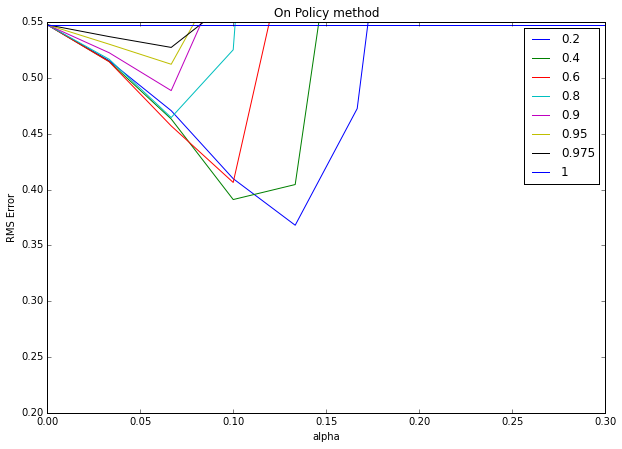

In [94]:
figsize(10,7)
plt.plot(alpha, t)
plt.ylabel('RMS Error')
plt.xlabel('alpha')
plt.legend(lambda_)
plt.title('On Policy method')
plt.ylim((0.2,0.55))

In [15]:
n = [1,2,3,5,8,15,30,60,100,200,1000]
alpha = np.arange(0, 1.1, .1)
nStates = 19
tdnrandomWalk = TDnRandomWalk(nStates, n, alpha)

In [16]:
tdnrandomWalk.generateEpisodes(10)

In [18]:
tdnrandomWalk.evaluateVOffline(0.1,10)

array([-0.34174   , -0.32077   , -0.44812   , -0.3902412 , -0.30056715,
       -0.24025297, -0.04055375,  0.03620803,  0.26300624,  0.21053925,
        0.16732147,  0.33669163,  0.31322087,  0.60175773,  0.63657598,
        0.50579191,  0.52644551,  0.57745864,  0.69530716])

In [19]:
T = 100
t = tdnrandomWalk.RMSError()

(0, 0.55)

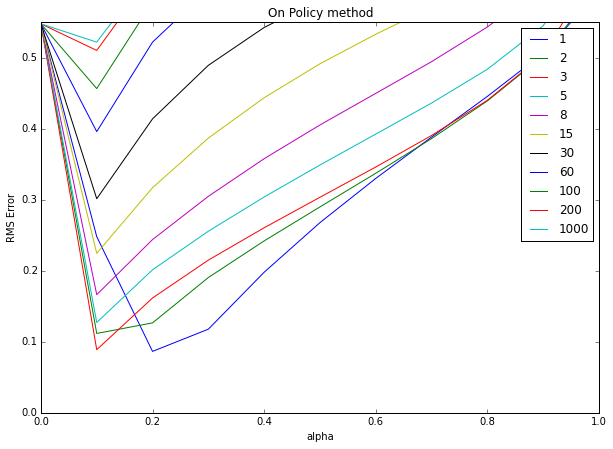

In [25]:
figsize(10,7)
plt.plot(np.arange(0.0, 1.1, 0.1), t[0].T)
plt.ylabel('RMS Error')
plt.xlabel('alpha')
plt.legend(n)
plt.title('On Policy method')
plt.ylim((0,0.55))

plt.figure()

figsize(10,7)
plt.plot(np.arange(0.0, 1.1, 0.1), t[1].T)
plt.ylabel('RMS Error')
plt.xlabel('alpha')
plt.legend(n)
plt.title('On Policy method')

In [26]:
T = 100
tdnrandomWalk.alpha = np.linspace(0,0.3,100)
t = tdnrandomWalk.RMSError()

(0.2, 0.55)

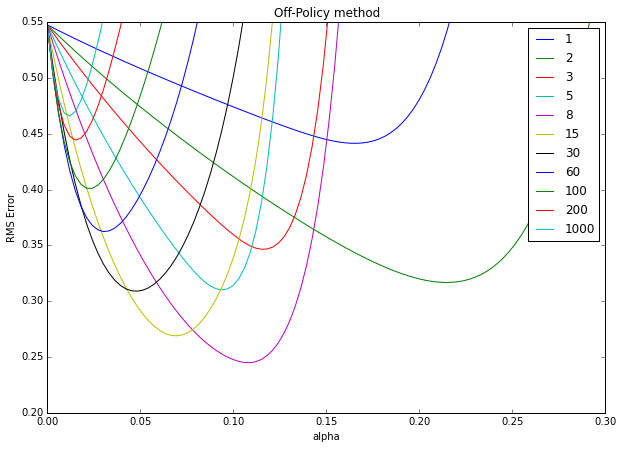

In [29]:
figsize(10,7)
plt.plot(np.linspace(0.0, 0.3, 100), t[1].T)
plt.ylabel('RMS Error')
plt.xlabel('alpha')
plt.legend(n)
plt.xlim([0,0.3])
plt.title('Off-Policy method')
plt.ylim([0.2,0.55])

### The questions that come into mind after looking into this graph
1. as if alpha is high, as n increases the rms error increases?
2. For all n, there is a $\alpha$ value where the error is minimum. Why?
3. Why is the graph like this?
